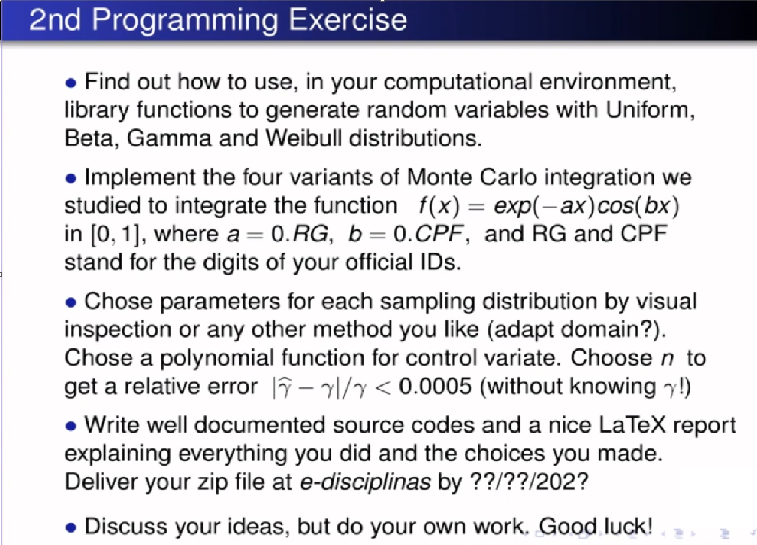

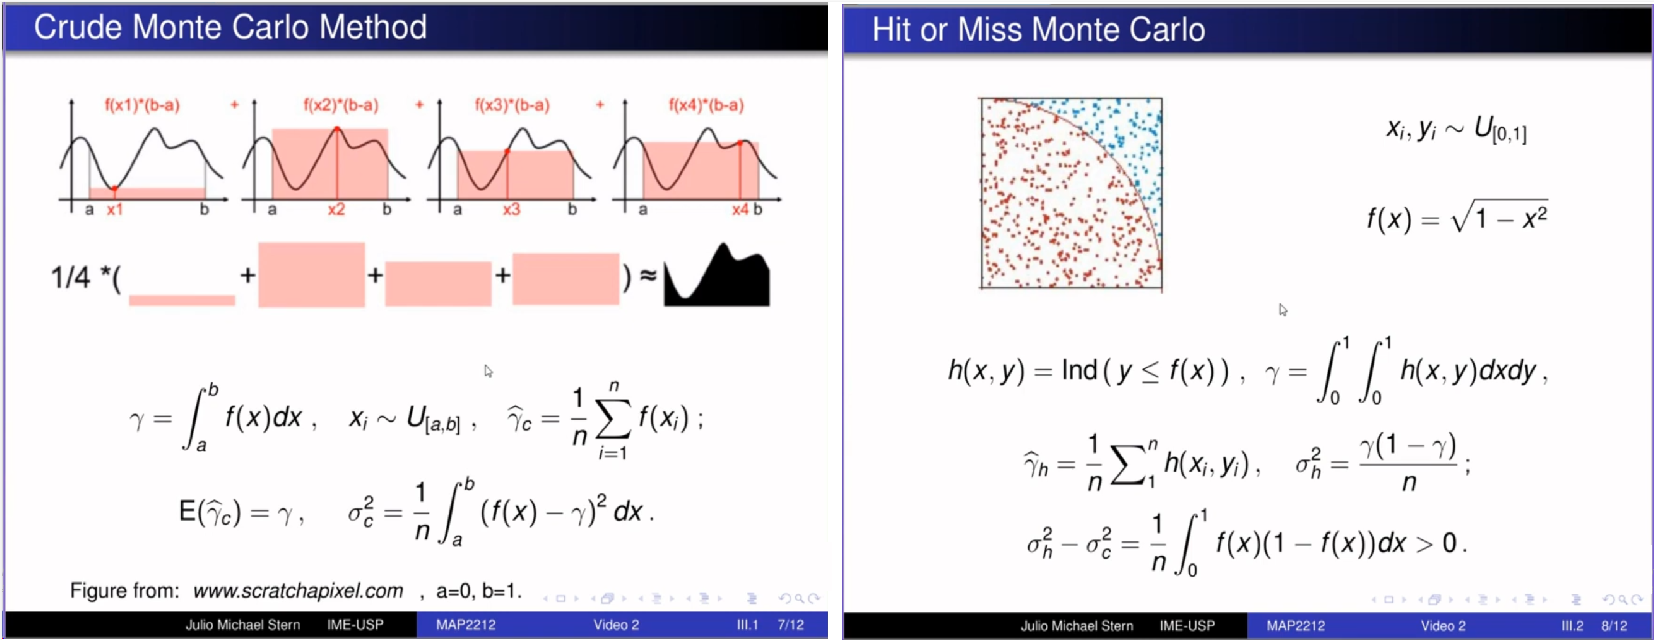

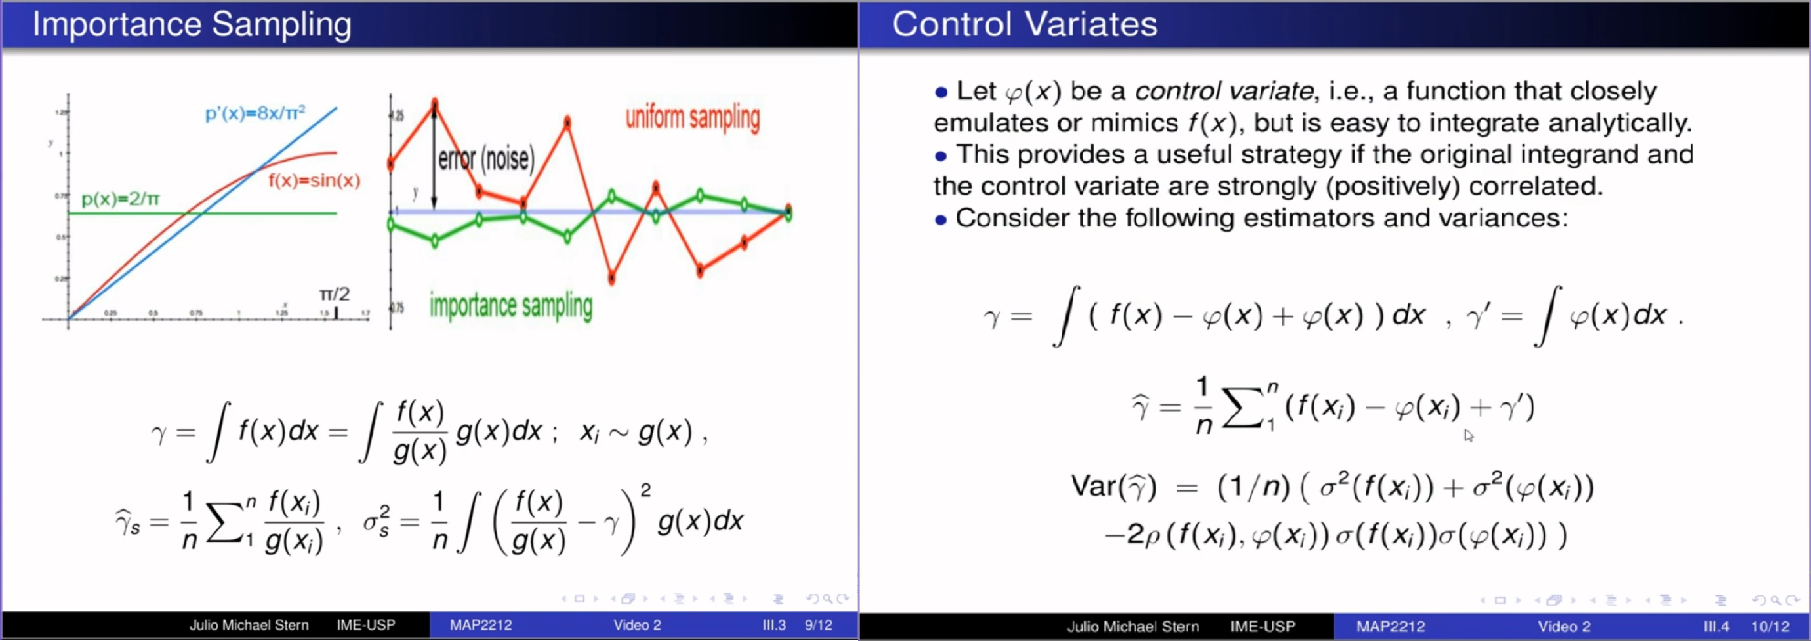

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#Escreva seu nome e numero USP
INFO = {11811012:"Vinícius da Costa Collaço"}
A = 0.460279  # A = 0.rg (6 dígitos siginificativos)
B = 0.382023 # B = 0.cpf (6 dígitos siginificativos)

In [ ]:
#Bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import truncexpon
import time

In [ ]:
def gera_ponto(n):
  """
  Funcao para gerar um array com n pontos 
  """
  x = np.random.uniform(low=0,high=1, size=n)

  return x

In [ ]:
def gera_pontos(n):
  """
  Funcao para gerar dois array com n pares de pontos 
  """
  x = np.random.uniform(low=0,high=1, size=n)
  y = np.random.uniform(low=0,high=1, size=n)

  return x, y

In [ ]:
def indicadora (vetor):
  """
  Indicadora da Hit or Miss (1 ou 0)
  """
  true_or_false = vetor[1] <= f(vetor[0])

  return np.where(true_or_false == True,1,0)

In [ ]:
def f_sobre_g(x):
  """
  Funcao agregada de f(x)/g(x) da importance sampling
  """
  A = 0.460279  # A = 0.rg (6 dígitos siginificativos)
  B = 0.382023 # B = 0.cpf (6 dígitos siginificativos)
  f_sobre_g = (np.cos(B*x)*(1 - np.exp(-A)))/A

  return f_sobre_g


In [ ]:
def phi(x):
  """
  Funcao phi(x) controle do metodo control variate
  """
  phi = (np.array(-x)/2.5) + 1
  
  return phi

In [ ]:
def f(x):
  """
  Esta funcao deve receber x e devolver f(x), como especifcado no enunciado
  Escreva o seu codigo nas proximas linhas
  """

  A = 0.460279  # A = 0.rg (6 dígitos siginificativos)
  B = 0.382023 # B = 0.cpf (6 dígitos siginificativos)
  F = (np.exp(-A*x))*np.cos(B*x)
  
  return F

In [ ]:
def crude(Seed=None, n=296596):
    """
    Esta funcao deve retornar a sua estimativa para o valor da integral de f(x)
    usando o metodo crude
    Escreva o seu codigo nas proximas linhas
    """
    random.seed(Seed)
    np.random.seed(Seed)

    pontos = gera_ponto (n)
    array_estimador = f(pontos)
    estima_crude = np.sum(array_estimador)/n

    return estima_crude

In [ ]:
def hit_or_miss(Seed=None, n=4852548):
    """
    Esta funcao deve retornar a sua estimativa para o valor da integral de f(x)
    usando o metodo hit or miss
    Escreva o seu codigo nas proximas linhas
    """
    random.seed(Seed)
    np.random.seed(Seed)
    
    pontos = gera_pontos (n)
    pontos_dentro = indicadora (pontos)
    estima_HoM = sum(pontos_dentro)/n

    return estima_HoM

In [ ]:
def importance_sampling(Seed=None, n=7187):
    
    """
    Esta funcao deve retornar a sua estimativa para o valor da integral de f(x)
    usando o metodo importance sampling
    Escreva o seu codigo nas proximas linhas
    """
    random.seed(Seed)
    np.random.seed(Seed)

    b = 0.460279
    pontos = truncexpon.rvs(b=b, scale=1/b, size=n)
    array_estimador = f_sobre_g(pontos)
    estima_importance_sampling = np.sum(array_estimador)/n

    return estima_importance_sampling


In [ ]:
def control_variate(Seed=None, n=884):
    """
    Esta funcao deve retornar a sua estimativa para o valor da integral de f(x)
    usando o metodo control variate
    Escreva o seu codigo nas proximas linhas
    """
    random.seed(Seed)
    np.random.seed(Seed)

    pontos = gera_ponto(n)
    array_f = f(pontos)
    array_phi = phi(pontos)
    integral_phi = 0.8 #calculada algebricamente
    estima_control_variate = np.mean(array_f) - np.mean(array_phi) + integral_phi
    
    return estima_control_variate

In [ ]:
def variancias (Seed=38, n=100):
  """ 
  Funcao para calculo das variancias empiricas
  """  
  random.seed(Seed)
  np.random.seed(Seed)

  #Variancia do metodo Crude
  pontos = gera_ponto (n)
  array_estimador = f(pontos)
  var_crude = np.var(array_estimador, ddof=1)

  #Variancia do metodo Hit or Miss
  estima_HoM = hit_or_miss(Seed=Seed,n=n)
  var_HoM = (estima_HoM * (1 - estima_HoM))

  #Variancia do metodo Importance Sampling
  b = 0.460279
  pontos = truncexpon.rvs(b=b, scale=1/b, size=n)
  array_estimador_IS = f_sobre_g(pontos)
  var_IS = np.var(array_estimador_IS, ddof=1)

  #Variancia do metodo Control Variate
  pontos = gera_ponto(n)
  array_f = f(pontos)
  array_phi = phi(pontos)
  var_CV = (np.var(array_f, ddof=1) 
            + np.var(array_phi, ddof=1) 
            - 2*np.cov(array_f,array_phi,ddof=1)[0,1])
  
  return var_crude, var_HoM, var_IS, var_CV

In [ ]:
def main():
    #Coloque seus testes aqui
    z = 1.96
    var_crude, var_hom, var_IS, var_CV = variancias()

    crude_est = crude(Seed=38, n=100)
    Ec = 0.0005 * crude_est
    n_crude = math.ceil(var_crude * z**2/Ec**2)
    t0 = time.time()
    MCc = crude(Seed=38, n=n_crude)
    t1 = time.time()
    print('Método Crude = ',MCc)
    print('Variancia Crude = ',var_crude)
    print('n_crude = ',n_crude)
    print('Tempo Crude = ',t1 - t0, 'segundos')
    print('Eficiência Crude = ', 1/((t1 - t0)*var_crude))

    hom_est = hit_or_miss(Seed=38, n=100)
    Ehom = 0.0005 * hom_est
    nhom = math.ceil(var_hom * z**2/Ehom**2)
    t0 = time.time()
    MChom = hit_or_miss(Seed=38, n=nhom)
    t1 = time.time()
    print('\nMétodo Hit or Miss = ',MChom)
    print('Variancia Hit or Miss = ', var_hom)
    print('n_hom = ',nhom)
    print ('Tempo Hit or Miss = ',t1 - t0, 'segundos')
    print('Eficiência Hit or Miss = ', 1/((t1 - t0)*var_hom))


    IS_est = importance_sampling(Seed=38, n=100)
    EIS = 0.0005 * IS_est
    nIS = math.ceil(var_IS * z**2/EIS**2)
    t0 = time.time()
    MCIS = importance_sampling(Seed=38, n=nIS)
    t1 = time.time() 
    print('\nMétodo Importance Sampling = ',MCIS)
    print('Variancia Importance Sampling = ', var_IS)
    print('n_IS = ',nIS)
    print('Tempo Importance Sampling = ',t1 - t0, 'segundos')
    print('Eficiência Importance Sampling = ', 1/((t1 - t0)*var_IS))

    CV_est = control_variate(Seed=38, n=100)
    ECV = 0.0005 * CV_est
    nCV = math.ceil(var_CV * z**2/ECV**2)
    t0 = time.time()
    MCCV = control_variate(Seed=38, n=nCV)
    t1 = time.time() 
    print('\nMétodo Control Variate = ',MCCV)
    print('Variancia Control Variate = ', var_CV)
    print('n_CV = ',nCV)
    print('Tempo Control Variate = ',t1 - t0, 'segundos')
    print('Eficiência Control Variate = ', 1/((t1 - t0)*var_CV))


if __name__ == "___main__":
    main()

In [ ]:
main()

Método Crude =  0.7842035821268286
Variancia Crude =  0.01154920943048405
n_crude =  296596
Tempo Crude =  0.019104480743408203 segundos
Eficiência Crude =  4532.235884651228

Método Hit or Miss =  0.7841412387883644
Variancia Hit or Miss =  0.1824
n_hom =  4852548
Tempo Hit or Miss =  0.727088451385498 segundos
Eficiência Hit or Miss =  7.540287746152237

Método Importance Sampling =  0.7843161580253135
Variancia Importance Sampling =  0.00028751406096232975
n_IS =  7187
Tempo Importance Sampling =  0.008136272430419922 segundos
Eficiência Importance Sampling =  427479.63442802575

Método Control Variate =  0.784142969586023
Variancia Control Variate =  3.5253577894429206e-05
n_CV =  884
Tempo Control Variate =  0.00023603439331054688 segundos
Eficiência Control Variate =  120177041.88090903


In [ ]:
real = 0.78428
print(abs(crude()-real)/real)
print(abs(hit_or_miss()-real)/real)
print(abs(importance_sampling()-real)/real)
print(abs(control_variate()-real)/real)

0.0001651711830392301
0.0003469337813972608
6.765413309603838e-05
7.974835425365101e-05
